<a href="https://colab.research.google.com/github/sherrywilly/CE880_Case_Study/blob/main/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the excel file and this file is stored in session storage
df = pd.read_excel("data_PostNatal.xlsx")
df.head() # first 5 elements in the dataframe

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


In [ ]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious'],
      dtype='object')

In [ ]:
df.info() # default info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling of guilt                           1494 non-null   object
 7   Problems of bonding with baby              1503 non-null   object
 8   Suicide attempt                            1503 non-null   object
 9   Feeling anxious                            1503 non-null   object
dtypes: object(10)
memory usage: 117.5+ K

In [ ]:
df.describe() # describe the data

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
count,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,364,536,555,640,583,841,624,557,709,980


In [ ]:
df.shape

(1503, 10)

In [ ]:
df.isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Irritable towards baby & partner',
 'Problems concentrating or making decision',
 'Feeling of guilt']

**Observations**
- > some datas are missing in  Irritable towards baby & partner,Problems concentrating or making decision , Feeling of guilt



<Axes: >

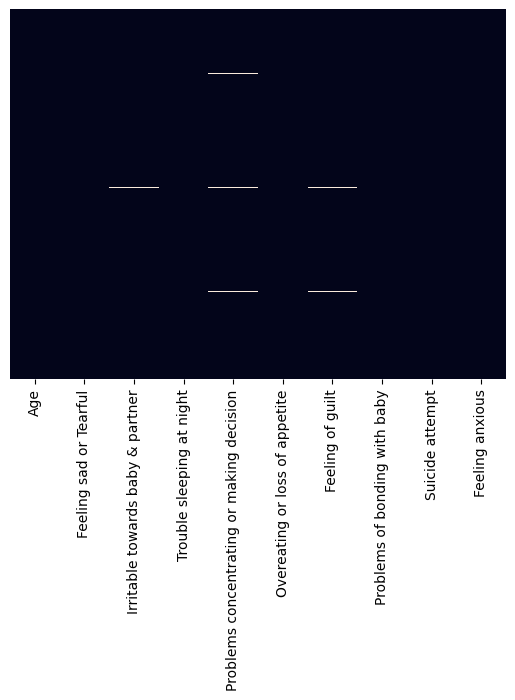

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
##To check Data Types
df.dtypes

Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
Feeling anxious                              object
dtype: object

In [ ]:
age_labels = df.query("`Feeling anxious`=='Yes'").Age.value_counts().index

In [ ]:
age_values = df.query("`Feeling anxious`=='Yes'").Age.value_counts().values

([<matplotlib.patches.Wedge at 0x7bdd0fa0f700>,
 [Text(0.8119308952508195, 0.7421376026972377, '35-40'),
  Text(-0.6550921969496148, 0.8836595574630127, '40-45'),
  Text(-0.9601760729328171, -0.5367139917752409, '30-35'),
  Text(0.3028243603377923, -1.057495818803085, '45-50'),
  Text(1.0394309482627329, -0.3599768100775888, '25-30')],
 [Text(0.44287139740953785, 0.4048023287439478, '23.57%'),
  Text(-0.35732301651797166, 0.4819961222525523, '23.16%'),
  Text(-0.5237324034179002, -0.2927530864228587, '22.76%'),
  Text(0.16517692382061397, -0.576815901165319, '19.90%'),
  Text(0.566962335416036, -0.1963509873150484, '10.61%')])

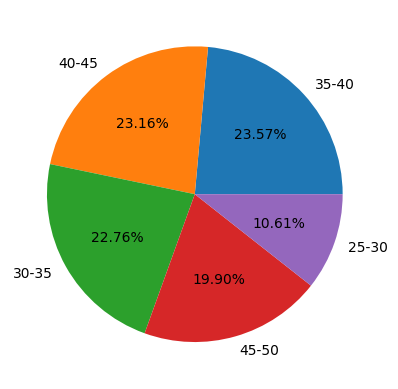

In [ ]:
plt.pie(age_values,labels=age_labels,autopct='%1.2f%%')

**Observations**
- > age group of 35-40 have most number of anxious people
- > age group of 25- 30 have least number of anxious people

In [ ]:
df.query("`Feeling anxious`=='Yes'").isnull().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64

In [ ]:
df.groupby(['Age','Feeling anxious']).size().reset_index()

,Age,Feeling anxious,0
0,25-30,No,77
1,25-30,Yes,104
2,30-35,No,115
3,30-35,Yes,223
4,35-40,No,118
5,35-40,Yes,231
6,40-45,No,137
7,40-45,Yes,227
8,45-50,No,76
9,45-50,Yes,195


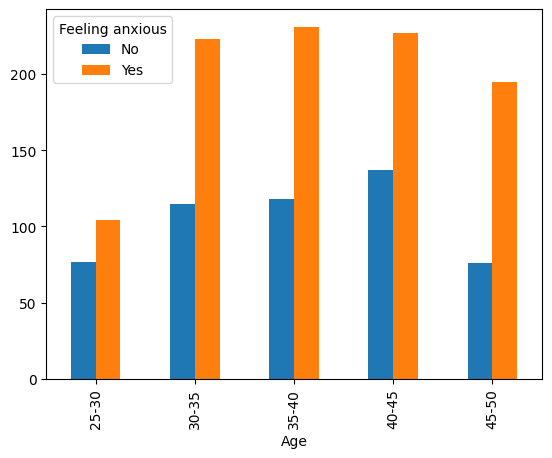

In [66]:
crosstab_results = pd.crosstab(df['Age'], df['Feeling anxious'])
crosstab_results.plot(kind='bar')
plt.show()

In [48]:
# for col in df.select_dtypes(include=['object'])[:7]:
#   print(f"Column: {col}")
#   df[col].value_counts().plot(kind='bar')
#   plt.show()
# crosstab_results.plot(kind='bar')

columns = df.select_dtypes(include=['object']).columns[:-1]


Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

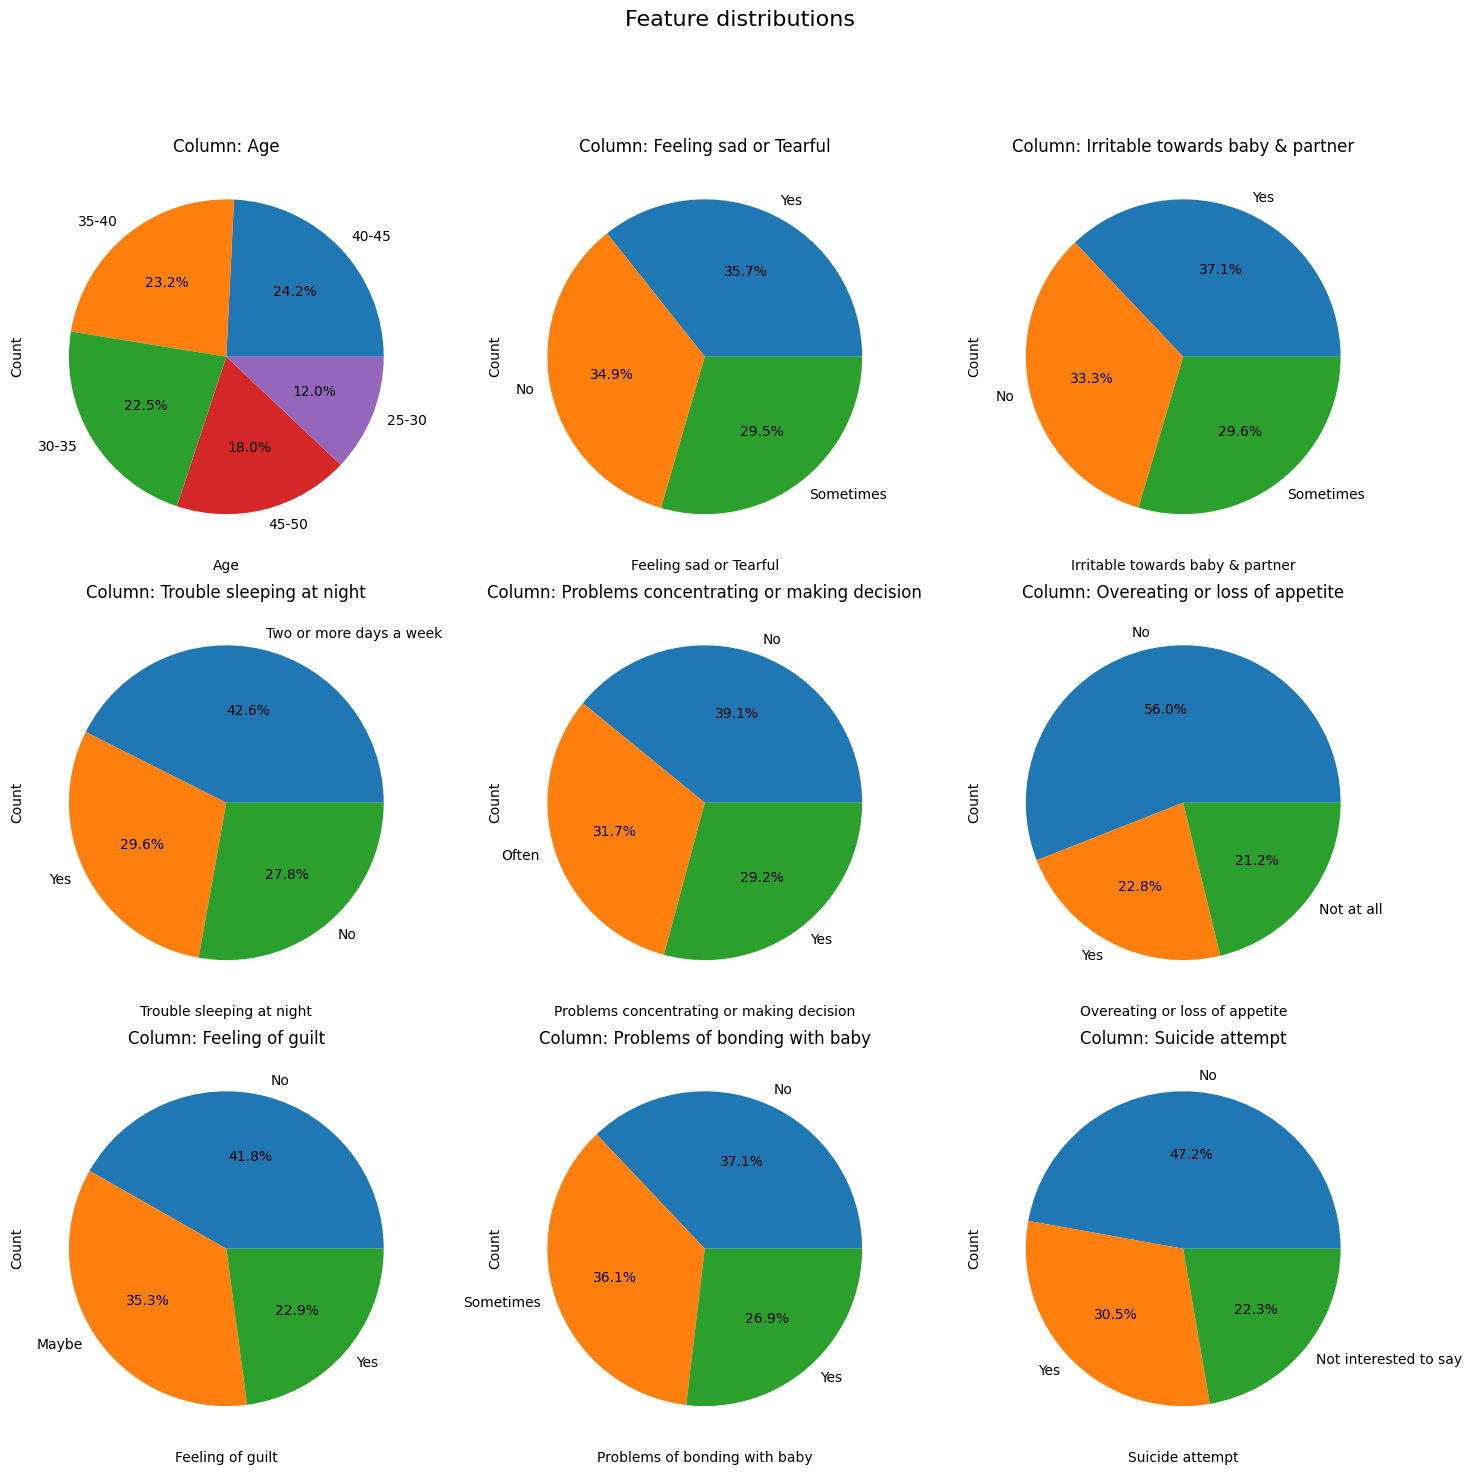

In [74]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3 * 5))
for index, column in enumerate(columns):
    row_idx,col_idx = index // 3,index % 3
    ax = axes[row_idx, col_idx]
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%',ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.set_title(f"Column: {column}")
fig.suptitle("Feature distributions", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

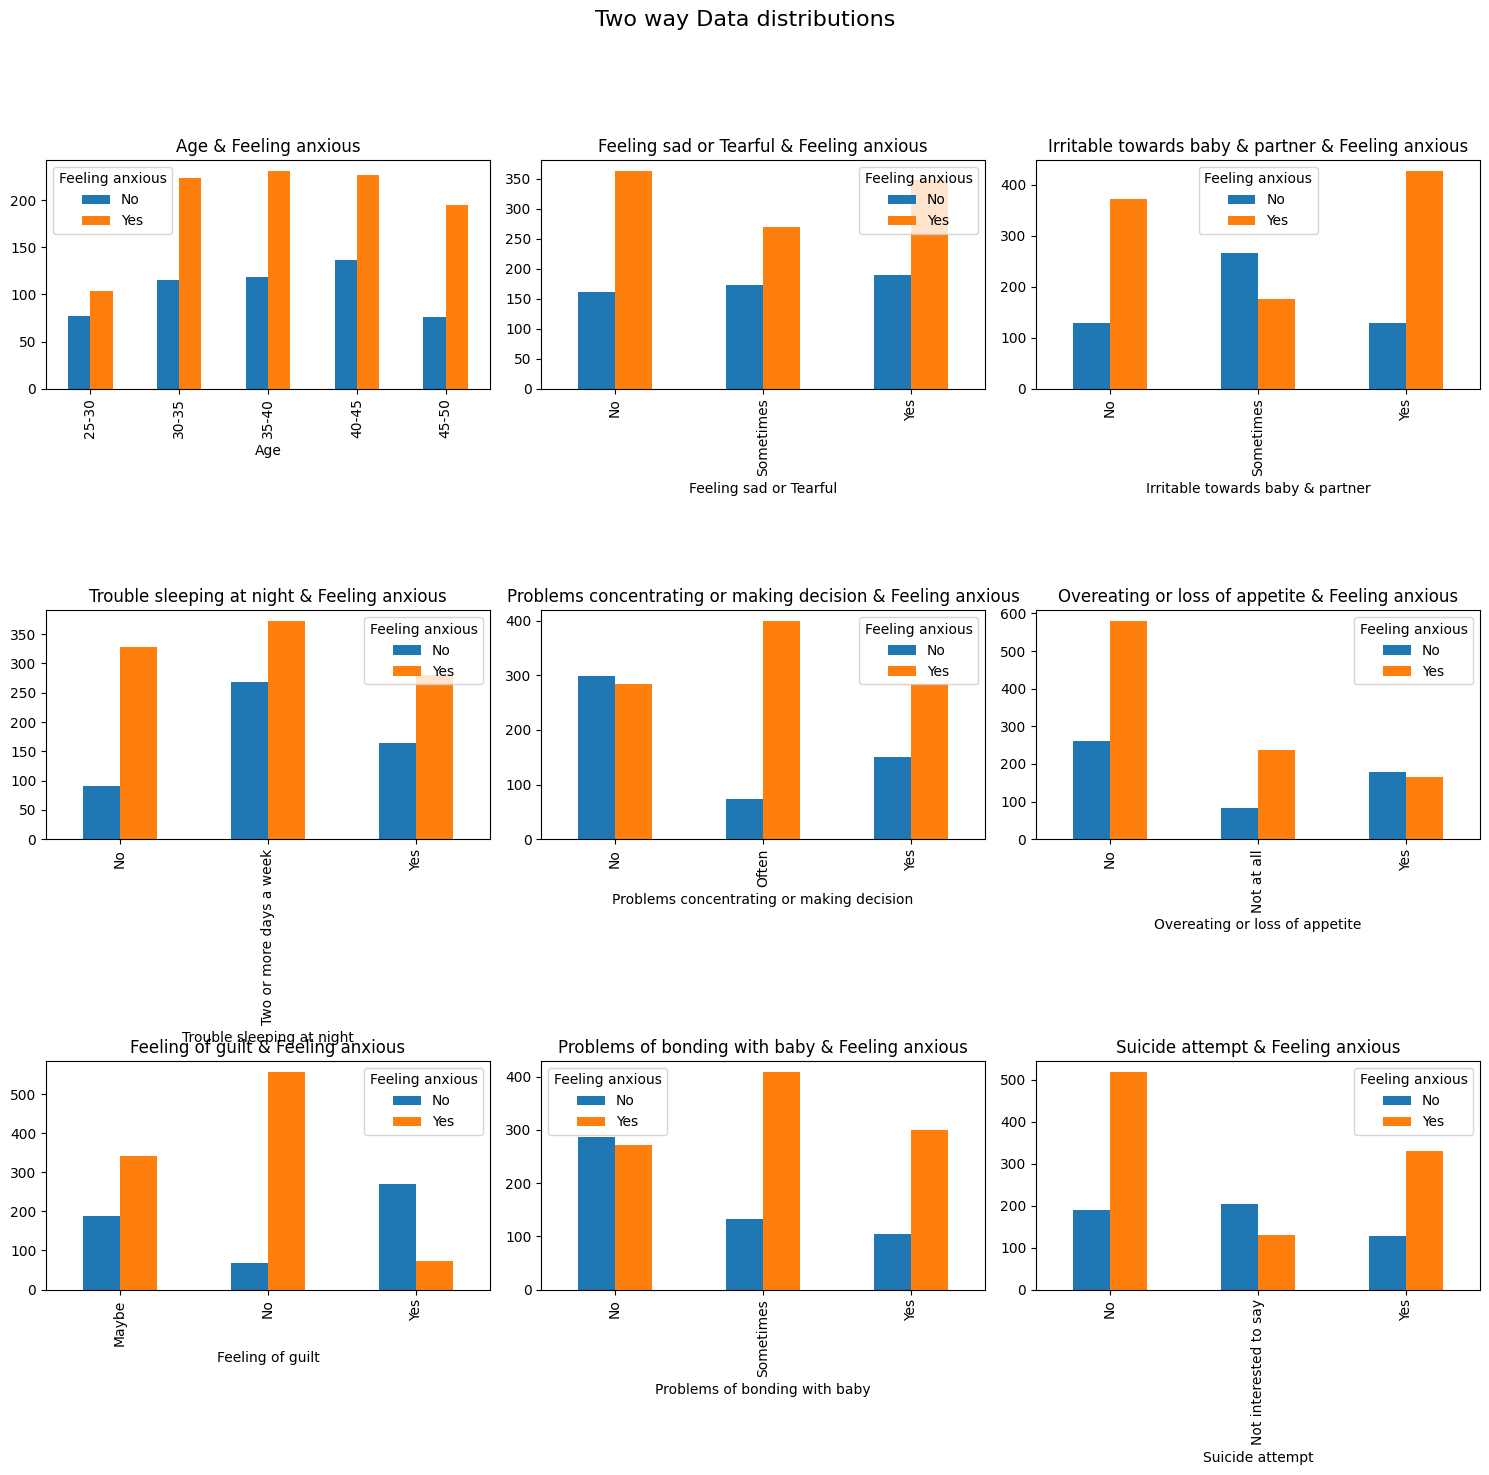

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3 * 5))
for index, column in enumerate(columns):
    row_idx,col_idx = index // 3,index % 3
    ax = axes[row_idx, col_idx]
    pd.crosstab(df[column], df['Feeling anxious']).plot(kind='bar',ax=ax)
    ax.set_title(f"{column} & Feeling anxious")
fig.suptitle("Two way Data distributions", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [75]:
df[df.isnull().any(axis=1)]

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
260,35-40,No,Yes,Yes,NaN,No,No,Yes,Yes,Yes
261,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,NaN,Yes,Yes,Yes
262,35-40,Yes,NaN,Yes,NaN,Yes,NaN,No,No,Yes
263,40-45,Yes,NaN,No,NaN,No,NaN,Sometimes,No,Yes
721,35-40,No,Yes,Yes,NaN,No,No,Yes,Yes,Yes
722,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,NaN,Yes,Yes,Yes
723,35-40,Yes,NaN,Yes,NaN,Yes,NaN,No,No,Yes
724,40-45,Yes,NaN,No,NaN,No,NaN,Sometimes,No,Yes
1146,35-40,No,Yes,Yes,NaN,No,No,Yes,Yes,Yes
1147,40-45,Yes,Yes,Two or more days a week,NaN,Not at all,NaN,Yes,Yes,Yes
